In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To convert string to numeric
from sklearn.preprocessing import LabelEncoder

# For decision tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# To split the data
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import export_text

# Visualize decision tree
from sklearn import tree

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

# Company Data

### Read the data 

In [2]:
df = pd.read_csv('D:\Data Science Assignments\Assignment 14 Decision Tree\Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### EDA

In [3]:
df['Sales'].max()

16.27

In [4]:
df['Sales'].min()

0.0

### Label encoding 

In [5]:
label_encoder = LabelEncoder()

threshold_low = 5
threshold_high =10
df['Sale_Category'] = label_encoder.fit_transform(pd.cut(df['Sales'],bins=[0,threshold_low,threshold_high, np.inf], labels=['Low', 'Medium', 'High']))
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,2
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,2
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,2


### Outlier detection 

In [6]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower,data[col]))

In [7]:
X = df.drop(['Sales', 'Sale_Category'], axis=1)

In [8]:
X = pd.get_dummies(X)

In [9]:
y = df['Sale_Category']

### Independent feature and Target column

In [10]:
X,y

(     CompPrice  Income  Advertising  Population  Price  Age  Education  \
 0          138      73           11         276    120   42         17   
 1          111      48           16         260     83   65         10   
 2          113      35           10         269     80   59         12   
 3          117     100            4         466     97   55         14   
 4          141      64            3         340    128   38         13   
 ..         ...     ...          ...         ...    ...  ...        ...   
 395        138     108           17         203    128   33         14   
 396        139      23            3          37    120   55         11   
 397        162      26           12         368    159   40         18   
 398        100      79            7         284     95   50         12   
 399        134      37            0          27    120   49         16   
 
      ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
 0                1 

### Splitting the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

In [12]:
# Building the decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Prediction 

In [13]:
y_pred = model.predict(X_test)

### Evaluation 

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.47      0.55        19
           1       0.38      0.43      0.40        14
           2       0.66      0.70      0.68        47

    accuracy                           0.60        80
   macro avg       0.56      0.53      0.54        80
weighted avg       0.61      0.60      0.60        80



In [15]:
# Visualize the decision tree
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

|--- ShelveLoc_Good <= 0.50
|   |--- Price <= 125.50
|   |   |--- Advertising <= 7.50
|   |   |   |--- ShelveLoc_Bad <= 0.50
|   |   |   |   |--- Age <= 39.50
|   |   |   |   |   |--- Price <= 97.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Price >  97.00
|   |   |   |   |   |   |--- CompPrice <= 114.50
|   |   |   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- CompPrice >  114.50
|   |   |   |   |   |   |   |--- CompPrice <= 157.00
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- CompPrice >  157.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  39.50
|   |   |   |   |   |--- CompPrice <= 87.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- CompPrice >  87.00
|   |   |   |   |   |   |--- Price <= 105.50
|   |   |   |   |   |   |   |--- class

# Fraud check

### Read the dataset

In [16]:
df = pd.read_csv('D:\Data Science Assignments\Assignment 14 Decision Tree\Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Describe the data 

In [17]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


### Missing value 

In [19]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Duplicated Records 

In [20]:
df.duplicated().sum()

0

<Axes: >

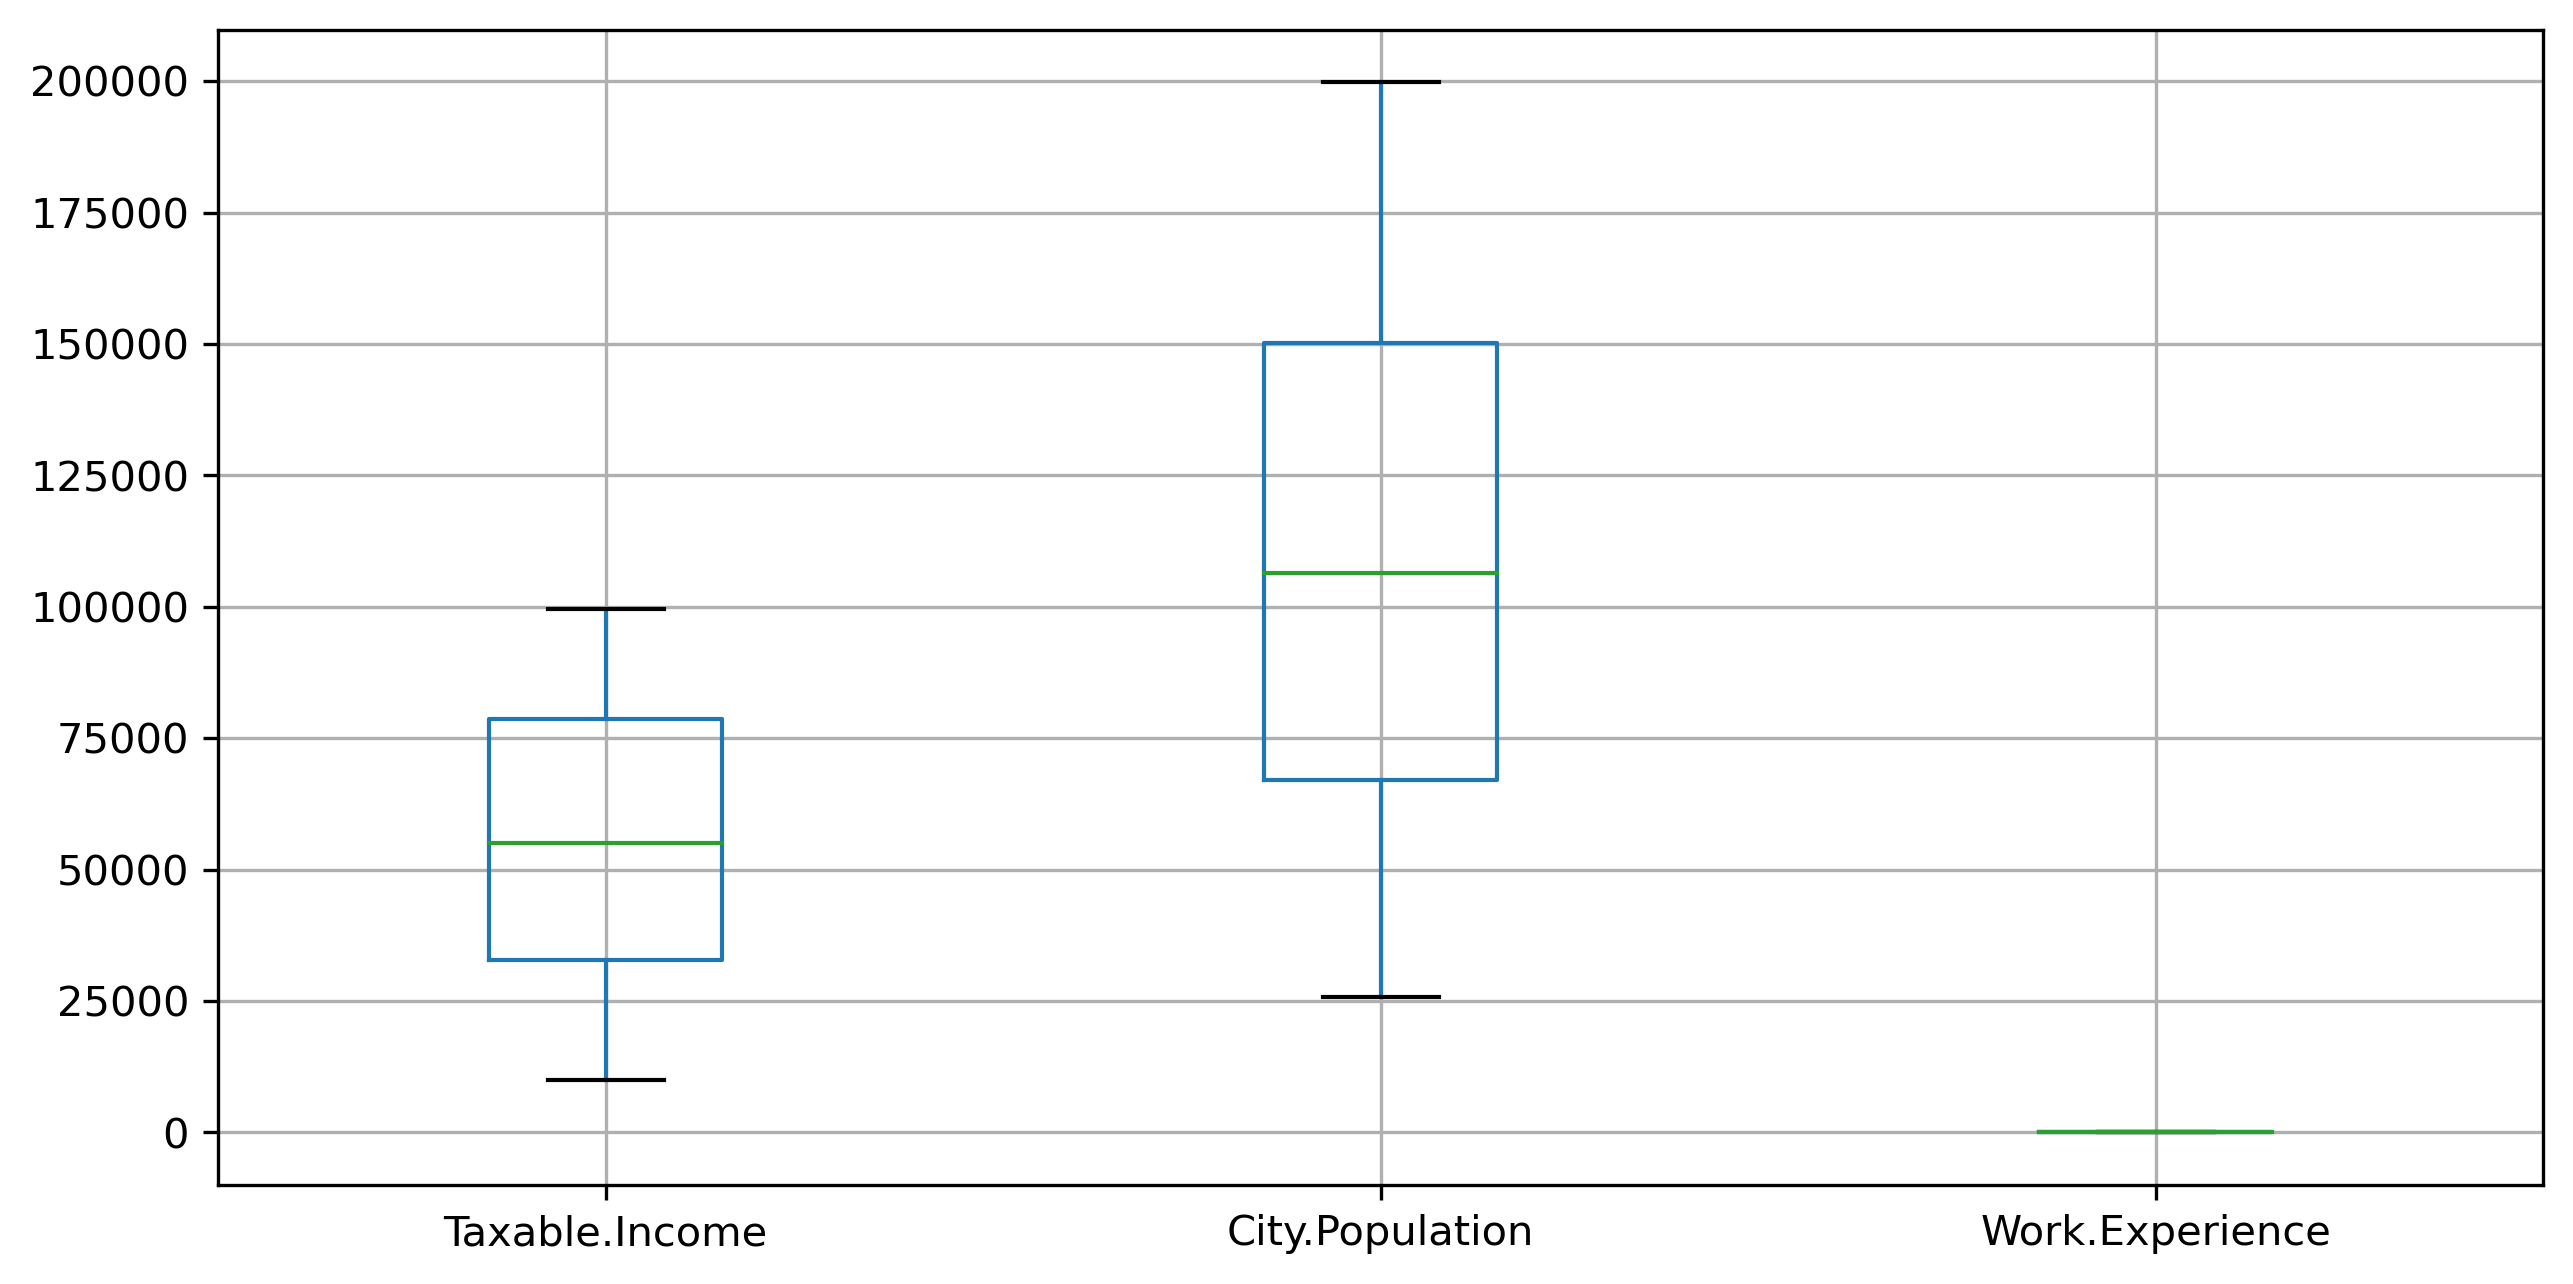

In [21]:
df.boxplot()

In [22]:
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [23]:
df['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [24]:
df = pd.get_dummies(df, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

In [25]:
# Define x & y
x = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']

### Split the data 

In [26]:
# Split the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [27]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)
ypred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.78      0.99      0.87        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [30]:
print("Accuracy:", metrics.accuracy_score(ytest, ypred))

Accuracy: 0.775


In [31]:
# Display the decision tree rules
tree_rules = export_text(dt, feature_names=list(x.columns))
print(tree_rules)

|--- Marital.Status_Married <= 0.50
|   |--- Work.Experience <= 29.50
|   |   |--- Work.Experience <= 23.50
|   |   |   |--- class: Good
|   |   |--- Work.Experience >  23.50
|   |   |   |--- class: Good
|   |--- Work.Experience >  29.50
|   |   |--- City.Population <= 121060.50
|   |   |   |--- class: Good
|   |   |--- City.Population >  121060.50
|   |   |   |--- class: Risky
|--- Marital.Status_Married >  0.50
|   |--- City.Population <= 177179.50
|   |   |--- City.Population <= 175884.50
|   |   |   |--- class: Good
|   |   |--- City.Population >  175884.50
|   |   |   |--- class: Risky
|   |--- City.Population >  177179.50
|   |   |--- City.Population <= 192382.00
|   |   |   |--- class: Good
|   |   |--- City.Population >  192382.00
|   |   |   |--- class: Good

